In [1]:
# import os
# os.system("pip install --upgrade pip")
# os.system("python3.8 -m pip install --upgrade pip")
# os.system("pip install --extra-index-url=https://pypi.celonis.cloud/ pycelonis --upgrade")
# os.system("pip install pycelonis")

In [2]:
from pycelonis import *
from pycelonis.pql import *

In [3]:
url = "https://academic-if21b054-technikum-wien-at.eu-2.celonis.cloud/"

file = open('./APP_KEY.txt')

api_token = file.read()
file.close()

key_type = "APP_KEY"
celonis = get_celonis(base_url=url, api_token=api_token, key_type=key_type, permissions=False)

[2023-06-02 23:18:54,833] WARNING: Your PyCelonis Version 2.0.3 is outdated (Newest Version: 2.2.0). Please upgrade the package via: pip install --extra-index-url=https://pypi.celonis.cloud/ pycelonis pycelonis_core --upgrade


[2023-06-02 23:18:54,926] INFO: Initial connect successful! PyCelonis Version: 2.0.3


In [4]:
celonis.data_integration.get_data_pools()

[
	DataPool(id='5656d8b6-63fd-41f0-9e10-6183b71028c9', name='datapool-filtered-final-version'),
	DataPool(id='791de0ea-2d8b-43d2-946b-1bc034123683', name='datapool-final-version ')
]

In [5]:
data_pool_id = "5656d8b6-63fd-41f0-9e10-6183b71028c9"
data_pool = celonis.data_integration.get_data_pool(data_pool_id)

In [6]:
data_pool.get_data_models()

[
	DataModel(id='ad437bad-a13d-4f31-b247-0760c57ae3b0', name='datamodel-filtered-final-version', pool_id='5656d8b6-63fd-41f0-9e10-6183b71028c9'),
	DataModel(id='d4109623-5dcd-41c7-8a46-48d820f5f3bc', name='datamodel-filtered-final-version-backup', pool_id='5656d8b6-63fd-41f0-9e10-6183b71028c9')
]

In [7]:
data_model_id = "ad437bad-a13d-4f31-b247-0760c57ae3b0"
data_model = data_pool.get_data_model(data_model_id)

In [8]:
data_model.get_tables()

[
	DataModelTable(id='2047642b-f5bb-4791-b289-d37e9fbefa53', data_model_id='ad437bad-a13d-4f31-b247-0760c57ae3b0', name='ML_results_0', alias='ML_results_0', data_pool_id='5656d8b6-63fd-41f0-9e10-6183b71028c9'),
	DataModelTable(id='20f0e200-475d-40e5-a964-f75a7f401c8c', data_model_id='ad437bad-a13d-4f31-b247-0760c57ae3b0', name='rating', alias=None, data_pool_id='5656d8b6-63fd-41f0-9e10-6183b71028c9'),
	DataModelTable(id='79d54b0f-e39e-4aa3-a35d-592f0bb6abc9', data_model_id='ad437bad-a13d-4f31-b247-0760c57ae3b0', name='activities', alias=None, data_pool_id='5656d8b6-63fd-41f0-9e10-6183b71028c9')
]

In [9]:
activity_table_id = "79d54b0f-e39e-4aa3-a35d-592f0bb6abc9"
activity_table = data_model.get_table(activity_table_id)
activity_table
# activity_table.get_columns()
# dir(activity_table)

DataModelTable(id='79d54b0f-e39e-4aa3-a35d-592f0bb6abc9', data_model_id='ad437bad-a13d-4f31-b247-0760c57ae3b0', name='activities', alias=None, data_pool_id='5656d8b6-63fd-41f0-9e10-6183b71028c9')

In [10]:
ratings_table_id = "043caccb-8ced-4c69-8444-cb0146d3bd2b"
ratings_table = data_model.get_table(activity_table_id)
ratings_table

DataModelTable(id='79d54b0f-e39e-4aa3-a35d-592f0bb6abc9', data_model_id='ad437bad-a13d-4f31-b247-0760c57ae3b0', name='activities', alias=None, data_pool_id='5656d8b6-63fd-41f0-9e10-6183b71028c9')

In [11]:
query = PQL(distinct=False, limit=None, offset=None)
query += PQLColumn(name="Zeit", query=""" "ACTIVITIES"."zeit" """)
query += PQLColumn(name="Vollständiger Name", query=""" "ACTIVITIES"."Vollständiger Name" """)
query += PQLColumn(name="Ereigniskontext - Ereignisname", query=""" "ACTIVITIES"."Ereigniskontext - Ereignisname" """)

activity_df = data_model.export_data_frame(query)
activity_df

[2023-06-02 23:18:56,380] INFO: Successfully created data export with id '6b9b9e53-11ff-4aca-894d-bd2cefad0fb7'
[2023-06-02 23:18:56,382] INFO: Wait for execution of data export with id '6b9b9e53-11ff-4aca-894d-bd2cefad0fb7'


0it [00:00, ?it/s]

[2023-06-02 23:18:56,459] INFO: Export result chunks for data export with id '6b9b9e53-11ff-4aca-894d-bd2cefad0fb7'


,Zeit,Vollständiger Name,Ereigniskontext - Ereignisname
0,2022-09-13 18:48:00,Student1,Test: Quiz 1 - Testversuch gestartet
1,2022-09-13 19:05:00,Student1,Test: Quiz 1 - Testversuch eingereicht
2,2022-09-16 11:47:00,Student1,Test: Quiz 1 - Testversuch gestartet
3,2022-09-16 11:57:00,Student1,Test: Quiz 1 - Testversuch eingereicht
4,2022-09-16 11:57:00,Student1,Test: Quiz 1 - Testversuch gestartet
...,...,...,...
1097,2022-10-19 10:27:00,Student9,Test: Quiz 6 - Testversuch eingereicht
1098,2022-11-07 15:10:00,Student9,Test: Quiz 7 - Testversuch gestartet
1099,2022-11-07 15:31:00,Student9,Test: Quiz 7 - Testversuch eingereicht
1100,2022-11-08 17:51:00,Student9,Test: Exam Attempt 1 - Testversuch gestartet


In [12]:
query = PQL(distinct=False, limit=None, offset=None)
query += PQLColumn(name="Nr", query=""" "RATING"."Nr" """)
query += PQLColumn(name="Test: Quiz 1 (Punkte)", query=""" "RATING"."Test: Quiz 1 (Punkte)" """)
query += PQLColumn(name="Test: Quiz 2 (Punkte)", query=""" "RATING"."Test: Quiz 2 (Punkte)" """)
query += PQLColumn(name="Test: Quiz 3 (Punkte)", query=""" "RATING"."Test: Quiz 3 (Punkte)" """)
query += PQLColumn(name="Test: Quiz 4 (Punkte)", query=""" "RATING"."Test: Quiz 4 (Punkte)" """)
query += PQLColumn(name="Test: Quiz 5 (Punkte)", query=""" "RATING"."Test: Quiz 5 (Punkte)" """)
query += PQLColumn(name="Test: Quiz 6 (Punkte)", query=""" "RATING"."Test: Quiz 6 (Punkte)" """)
query += PQLColumn(name="Test: Quiz 7 (Punkte)", query=""" "RATING"."Test: Quiz 7 (Punkte)" """)
query += PQLColumn(name="Quiz gesamt (Punkte)", query=""" "RATING"."Quiz gesamt (Punkte)" """)
query += PQLColumn(name="Test: Exam Attempt 1 (Punkte)", query=""" "RATING"."Test: Exam Attempt 1 (Punkte)" """)
query += PQLColumn(name="Kurs gesamt (Punkte)", query=""" "RATING"."Kurs gesamt (Punkte)" """)
query += PQLColumn(name="Name", query=""" "RATING"."Name" """)

rating_df = data_model.export_data_frame(query)
rating_df

[2023-06-02 23:18:56,775] INFO: Successfully created data export with id '2ad77176-38c8-4e77-966a-4522e9deb469'
[2023-06-02 23:18:56,776] INFO: Wait for execution of data export with id '2ad77176-38c8-4e77-966a-4522e9deb469'


0it [00:00, ?it/s]

[2023-06-02 23:18:58,909] INFO: Export result chunks for data export with id '2ad77176-38c8-4e77-966a-4522e9deb469'


,Nr,Test: Quiz 1 (Punkte),Test: Quiz 2 (Punkte),Test: Quiz 3 (Punkte),Test: Quiz 4 (Punkte),Test: Quiz 5 (Punkte),Test: Quiz 6 (Punkte),Test: Quiz 7 (Punkte),Quiz gesamt (Punkte),Test: Exam Attempt 1 (Punkte),Kurs gesamt (Punkte),Name
0,0,10.0,11.0,10.0,12.0,8.6,11.0,7.0,46.65,50.0,97.32,Student27
1,1,9.1,10.8,7.7,7.7,0.0,6.1,4.0,30.37,47.5,81.30,Student18
2,3,10.0,11.0,10.0,12.0,13.4,10.5,4.0,46.78,35.0,79.42,Student33
3,4,10.0,11.0,10.0,10.9,13.8,11.0,7.0,49.08,28.0,72.86,Student34
4,5,10.0,11.0,10.0,12.0,14.0,11.0,7.0,50.00,47.5,97.00,Student1
5,6,9.7,11.0,10.0,12.0,14.0,11.0,7.0,49.78,32.0,78.23,Student11
6,7,10.0,11.0,10.0,8.8,0.0,0.0,0.0,25.22,0.0,20.17,Student15
7,8,9.5,11.0,10.0,11.0,13.1,10.7,1.0,43.17,48.0,92.13,Student37
8,9,7.8,9.4,9.1,11.7,10.3,9.0,3.9,40.43,46.7,88.38,Student25
9,10,10.0,11.0,10.0,12.0,14.0,11.0,7.0,50.00,50.0,100.00,Student29


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


In [14]:
# read the data
df = rating_df


df = df.drop(["Quiz gesamt (Punkte)",], axis=1)

# extract X,y arrays
quiz_columns = [string for string in df.columns if "Quiz" in string and "gesamt" not in string]
X = df[quiz_columns].astype(float)
y_test = df["Test: Exam Attempt 1 (Punkte)"].astype(float)
y_total = df["Kurs gesamt (Punkte)"].astype(float)

# scale X
mmSc = MinMaxScaler()
X = mmSc.fit_transform(X)

# split into train and test
X_train_test, X_test_test, y_train_test, y_test_test = train_test_split(X, y_test, test_size=0.2, shuffle=False)
X_train_total, X_test_total, y_train_total, y_test_total = train_test_split(X, y_total, test_size=0.2, shuffle=False)
collector = []

# perform KNN for k in (1,15)
"""for k in range(1, 15):
    knn = KNeighborsRegressor(k).fit(X_train, y_train)
    y_predict = knn.predict(X_test)

    collector.append({"k": k,
                      "mea": mean_absolute_error(y_test, y_predict),
                      "rmse": mean_squared_error(y_test, y_predict),
                      "medae": median_absolute_error(y_test, y_predict)
                      })

result = pd.DataFrame(collector)
print(result)"""

# try to predict X with all 0.0
knn_test = KNeighborsRegressor(5).fit(X_train_test, y_train_test)
knn_total = KNeighborsRegressor(5).fit(X_train_total, y_train_total)
# reg = LinearRegression().fit(X_train, y_train)
x_toPredict = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
predict_zero = knn_test.predict([x_toPredict])
# predict_zero = reg.predict([x_toPredict])
print(predict_zero)
# total_points = knn_total.predict([x_toPredict])
total_points = sum(x_toPredict) + predict_zero
print(total_points)

# print(predict_zero >= 30.0)
# predict_zero = 30.0




[27.44]
[27.44]


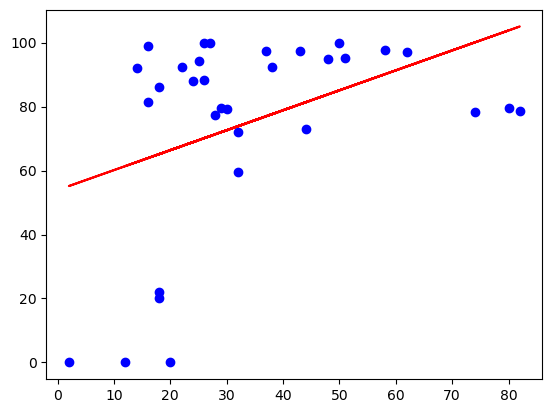

In [15]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)
df = activity_df
"""
dfs = {}
for name in activity_df['Vollständiger Name'].unique():
    dfs[name] = activity_df[activity_df['Vollständiger Name'] == name].reset_index(drop=True)
dfs['Student2']
"""
name_counts = df.groupby('Vollständiger Name').size().reset_index(name='activity_count')
activity_count_df = pd.DataFrame({'name': name_counts['Vollständiger Name'], 'activity_count': name_counts['activity_count']})
rating_name_df = rating_df[['Kurs gesamt (Punkte)', 'Name']].copy()
activity_count_df.rename(columns={'Vollständiger Name': 'Name'}, inplace=True)
rating_name_df.rename(columns={'Name': 'name'}, inplace=True)
merged = pd.merge(activity_count_df, rating_name_df, on='name', how='left')
merged.fillna(0.0, inplace=True)
X = np.array(merged['activity_count']).reshape(-1, 1)
y = merged['Kurs gesamt (Punkte)']
reg = LinearRegression().fit(X, y)
y_hat = reg.predict(X)
plt.scatter(X, y, color='blue', marker='o', label='True Points')
# plt.scatter(X, y_hat, color='red', marker='x', label='Predicted Points')
plt.plot(X, y_hat, color="red")
activity_predict_zero_total = reg.predict([[0.0]])
activity_predict_zero_total = activity_predict_zero_total[0]

In [23]:
df = rating_df
# extract X,y arrays
quiz_columns = [string for string in df.columns if "Quiz" in string and "gesamt" not in string]
X = df[quiz_columns].astype(float)
y_test = df["Test: Exam Attempt 1 (Punkte)"].astype(float)
y_total = df["Kurs gesamt (Punkte)"].astype(float)


# print(X.columns)
tree_reg = DecisionTreeRegressor(max_depth=10)
tree_reg.fit(X, y_total)
y_pred = tree_reg.predict(X)
# print(y_pred)
x_toPredict = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
print(tree_reg.predict([x_toPredict]))
x_toPredict = [10.0, 11.0, 10.0, 12.0, 14.0, 11.0, 7.0]
print(tree_reg.predict([x_toPredict]))
print(mean_squared_error(y, y_pred))

[0.]
[93.325]


ValueError: Found input variables with inconsistent numbers of samples: [32, 30]

In [17]:
ML_result = pd.DataFrame({"result": predict_zero, "total_points": total_points, "activity_zero": activity_predict_zero_total},  index=[0])
print(ML_result)

   result  total_points  activity_zero
0   27.44         27.44      53.896283


In [18]:
tables = data_model.get_tables()

In [19]:
data_pool.create_table(df=ML_result, table_name="ML_results_0", drop_if_exists=True, force=True)

[2023-06-02 23:19:02,164] WARNING: STRING columns are by default stored as VARCHAR(80) and therefore cut after 80 characters. You can specify a custom field length for each column using the `column_config` parameter.


[2023-06-02 23:19:02,231] INFO: Successfully created data push job with id 'ea921cc4-ea25-4ce1-a594-920bd718c969'
[2023-06-02 23:19:02,233] INFO: Add data frame as file chunks to data push job with id 'ea921cc4-ea25-4ce1-a594-920bd718c969'


  0%|          | 0/1 [00:00<?, ?it/s]

[2023-06-02 23:19:02,484] INFO: Successfully upserted file chunk to data push job with id 'ea921cc4-ea25-4ce1-a594-920bd718c969'
[2023-06-02 23:19:02,711] INFO: Successfully triggered execution for data push job with id 'ea921cc4-ea25-4ce1-a594-920bd718c969'
[2023-06-02 23:19:02,712] INFO: Wait for execution of data push job with id 'ea921cc4-ea25-4ce1-a594-920bd718c969'


0it [00:00, ?it/s]

[2023-06-02 23:19:06,916] INFO: Successfully created table 'ML_results_0' in data pool
[2023-06-02 23:19:07,142] INFO: Successfully deleted data push job with id 'ea921cc4-ea25-4ce1-a594-920bd718c969'


DataPoolTable(name='ML_results_0', data_source_id=None, columns=[], schema_name='5656d8b6-63fd-41f0-9e10-6183b71028c9', data_pool_id='5656d8b6-63fd-41f0-9e10-6183b71028c9')

In [20]:
tables.find("ML_results_0").delete()
data_model.add_table(name="ML_results_0", alias="ML_results_0")

[2023-06-02 23:19:07,823] INFO: Successfully deleted data model table with id '2047642b-f5bb-4791-b289-d37e9fbefa53'
[2023-06-02 23:19:07,895] INFO: Successfully added data model table with id '58204638-0fe4-48c4-a7e8-38ae3b35bd89' to data model


DataModelTable(id='58204638-0fe4-48c4-a7e8-38ae3b35bd89', data_model_id='ad437bad-a13d-4f31-b247-0760c57ae3b0', name='ML_results_0', alias='ML_results_0', data_pool_id='5656d8b6-63fd-41f0-9e10-6183b71028c9')

In [21]:
data_pool.get_tables()

[
	DataPoolTable(name='ML_result', data_source_id=None, columns=[], schema_name='5656d8b6-63fd-41f0-9e10-6183b71028c9', data_pool_id='5656d8b6-63fd-41f0-9e10-6183b71028c9'),
	DataPoolTable(name='ML_results', data_source_id=None, columns=[], schema_name='5656d8b6-63fd-41f0-9e10-6183b71028c9', data_pool_id='5656d8b6-63fd-41f0-9e10-6183b71028c9'),
	DataPoolTable(name='ML_results4', data_source_id=None, columns=[], schema_name='5656d8b6-63fd-41f0-9e10-6183b71028c9', data_pool_id='5656d8b6-63fd-41f0-9e10-6183b71028c9'),
	DataPoolTable(name='ML_results5', data_source_id=None, columns=[], schema_name='5656d8b6-63fd-41f0-9e10-6183b71028c9', data_pool_id='5656d8b6-63fd-41f0-9e10-6183b71028c9'),
	DataPoolTable(name='ML_results_0', data_source_id=None, columns=[], schema_name='5656d8b6-63fd-41f0-9e10-6183b71028c9', data_pool_id='5656d8b6-63fd-41f0-9e10-6183b71028c9'),
	DataPoolTable(name='activities', data_source_id=None, columns=[], schema_name='5656d8b6-63fd-41f0-9e10-6183b71028c9', data_pool_i

In [22]:
data_model.reload()

[2023-06-02 23:19:08,826] INFO: Successfully triggered data model reload for data model with id 'ad437bad-a13d-4f31-b247-0760c57ae3b0'
[2023-06-02 23:19:08,827] INFO: Wait for execution of data model reload for data model with id 'ad437bad-a13d-4f31-b247-0760c57ae3b0'


0it [00:00, ?it/s]